In [1]:
# 参考
# From the course: Bayesin Machine Learning in Python: A/B Testing
# https://www.udemy.com/bayesian-machine-learning-in-python-ab-testing
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
NUM_TRIALS = 1000
# EPSはDecaying　EPSを採用する
#EPS = 0.2
BANDIT_PROBABILITIES = [0.67, 0.86, 0.85, 0.88, 0.8, 0.971]

In [3]:
class Bandit:
    def __init__(self, p):
        self.p = p
        self.p_estimate = 0.0
        self.N = 0.0
    
    def pull(self):
        return np.random.random() < self.p
    
    def update(self, x):
        self.N += 1
        self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N
        
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    
    # ~~~ EPS ~~~~
    cnt = 0.0
    EPS = 0.0
    
    a = 10; b = 10; c = 5
    
    for i in range(NUM_TRIALS):

        # use epsilon-greedy to select the next bandit
        if np.random.random() < EPS:
             # collect data
            num_times_explored += 1
            j = random.choice(np.arange(len(bandits)))
        else:
            # select choice with highest win rate
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])

        if j == optimal_j:
            num_optimal += 1

        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()

        # update rewards log
        rewards[i] = x

        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)
        
        cnt += 1
        
        # decaying
        EPS = 1 / cnt
        #EPS = a / np.log(b*cnt + c)


    # print mean estimates for each bandit
    print('~'*10, 'print estimates', '~'*10)
    for b in bandits:
        print("mean estimate:", b.p_estimate, 'actual prob', b.p)
        
    # print total reward
    print('~'*10, 'print total reward', '~'*10)
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num_times_explored:", num_times_explored)
    print("num_times_exploited:", num_times_exploited)
    print("num times selected optimal bandit:", num_optimal)
  
    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()

~~~~~~~~~~ print estimates ~~~~~~~~~~
mean estimate: 0.7368421052631579 actual prob 0.67
mean estimate: 0.5 actual prob 0.86
mean estimate: 0.8578784757981462 actual prob 0.85
mean estimate: 0.5 actual prob 0.88
mean estimate: 0.0 actual prob 0.8
mean estimate: 0.0 actual prob 0.971
~~~~~~~~~~ print total reward ~~~~~~~~~~
total reward earned: 851.0
overall win rate: 0.851
num_times_explored: 10
num_times_exploited: 990
num times selected optimal bandit: 0


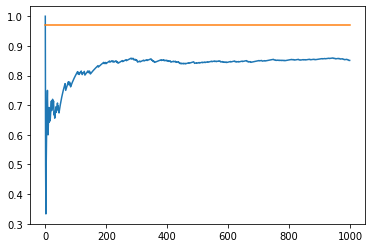

In [4]:
experiment()